In [266]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [267]:
df = pd.read_csv("Questionnaire_Responses.csv")

In [268]:
df.columns
rename_columns = ["time_submitted", "location", "major", "curr_activity_level", "past_activity_level",
              "exercise_importance", "prior_athlete", "sport_history", "exercise_locations",
              "off_campus_gym_freq", "avg_commute_mwf_off_campus", "avg_commute_tth_off_campus",
              "avg_commute_ss_off_campus", "commute_challenges_mwf_off_campus",
              "commute_challenges_tth_off_campus", "commute_challenges_ss_off_campus",
              "transportation_mwf_off_campus", "transportation_tth_off_campus", "transportation_ss_off_campus",
              "on_campus_gym_freq","avg_commute_mwf_on_campus", "avg_commute_tth_on_campus",
              "avg_commute_ss_on_campus", "commute_challenges_mwf_on_campus",
              "commute_challenges_tth_on_campus", "commute_challenges_ss_on_campus",
              "transportation_mwf_on_campus", "transportation_tth_on_campus", "transportation_ss_on_campus",
              "mwf_passing_gym", "tth_passing_gym", "ss_passing_gym", "main_gym_location","gen_gym_locations",
              "proximity_importance", "equipment_importance", "time_importance", "class_importance",
              "friends_importance", "student_athlete_importance", "other_importance", "main_motivator",
              "attend_gym_times", "email"]
df.columns = rename_columns
df_off = df
df_on = df

Pie Chart of main motivators

In [110]:
'''
Categorizes majors into:
    - EMOTION: feeling good/better, relieving stress
    - IMPROVEMENT: gaining muscle, improving body, weight loss, body image
    - MAINTAIN: maintaining body
    - ATHLETE: athletic things
    - CONVENIENCE: extra time/proximity
    - SOCIAL: friends, open gym
    - CLASS: rec class
    - OTH: random response/irrelevant or did not respond.
'''

def categorize_motivators (title):
    title = str(title).lower()
    title = title.strip()
    
    emotions = ['stress relief', 'feel good','emotion', 'stress', 'mood']
    improvement = ['gain', 'building muscle', 'get strong', 'get in shape', 'buff', 'out of shape',
                    'getting stronger','better legs', 'look good', 'losing weight', 'loss','improve',
                    'appearance','look gud','body', 'bodybuilding', 'abs', 'rehab', 'better', 'booty']
    maintain = ['maintain', 'staying', 'fit', 'take care of my body', 'to be active', 'health',
                'keeping', 'habit', 'routine']
    athlete = ['v o l l e y b a l l', 'athlete','sport', 'practice', 'gymnastics']
    convenience = ['convenience', 'extra time', 'hobby']
    social = ['friends','social']
    rec_class = ['class']
    
    output = "OTH"
    
    for label in emotions:
        if label in title:
            output = "EMOTION"

    for label in improvement:
        if label in title:
            output = "IMPROVEMENT"
        
    for label in maintain:
        if label in title:
            output = "MAINTAIN"
            
    for label in athlete:
        if label in title:
            output = "ATHLETE"
            
    for label in convenience:
        if label in title:
            output = "CONVENIENCE"
            
    for label in social:
        if label in title:
            output = "SOCIAL"
            
    for label in rec_class:
        if label in title:
            output = "CLASS"            
    
        
    return output

In [111]:
df['main_motivator'] = df['main_motivator'].apply(categorize_motivators)

In [113]:
df['main_motivator'].value_counts()

OTH            34
MAINTAIN       34
IMPROVEMENT    32
ATHLETE         6
EMOTION         5
SOCIAL          4
CONVENIENCE     3
CLASS           2
Name: main_motivator, dtype: int64

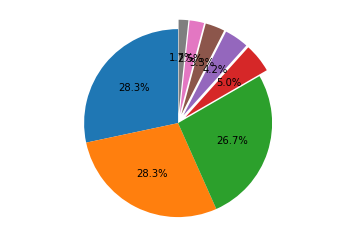

In [123]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise: 
fig1, ax1 = plt.subplots()
ax1.pie(df['main_motivator'].value_counts(), explode = explode, autopct='%1.1f%%',
        startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Exercise Locations vs Locations

In [220]:
#off campus people
df_off = df_off.loc[df_off['location'].isin(["I don't live on campus", "IG"])]

In [221]:
df_off['exercise_locations'].value_counts()

At an on campus gym (Main Gym, RIMAC, Spanos, Keeling, Canyon View), Off Campus                                             10
Off Campus                                                                                                                   8
At an on campus gym (Main Gym, RIMAC, Spanos, Keeling, Canyon View)                                                          7
At an on campus gym (Main Gym, RIMAC, Spanos, Keeling, Canyon View), Sports (IM, Club, Division)                             6
At an on campus gym (Main Gym, RIMAC, Spanos, Keeling, Canyon View), Off Campus, Sports (IM, Club, Division)                 4
Off Campus, Sports (IM, Club, Division)                                                                                      3
At an on campus gym (Main Gym, RIMAC, Spanos, Keeling, Canyon View), Outside (on campus), Off Campus                         2
At an on campus gym (Main Gym, RIMAC, Spanos, Keeling, Canyon View), Inside the Residential Halls/Apartments, O

In [215]:
'''
Indexed by:
0: "At an on campus gym (Main Gym, RIMAC, Spanos, Keeling, Canyon View)"
1: "Off Campus"
2: "Sports (IM, Club, Division)"
3: "Outside (on campus)"
4: "Inside the Residential Halls/Apartments"
'''
off_campus_count = [0,0,0,0,0]
def categorize_exercise_locations_off (title):
    title = str(title).lower()
    title = title.strip()
    
    if "at an on campus gym" in title:
        off_campus_count[0] += 1
    if "off campus" in title:
        off_campus_count[1] += 1
    if "sports" in title:
        off_campus_count[2] += 1
    if "outside" in title:
        off_campus_count[3] += 1
    if "inside the res" in title:
        off_campus_count[4] += 1

df_off['exercise_locations'].apply(categorize_exercise_locations_off)
off_campus_count

[30, 29, 13, 2, 2]

In [216]:
#on campus people
df_on = df_on.loc[df_on['location'].isin(['Warren', 'Revelle', 'Muir', 'Marshall', 'Sixth', 'ERC', 'The Village'])]


In [217]:
on_campus_count = [0,0,0,0,0]
def categorize_exercise_locations_on (title):
    title = str(title).lower()
    title = title.strip()
    
    if "at an on campus gym" in title:
        on_campus_count[0] += 1
    if "off campus" in title:
        on_campus_count[1] += 1
    if "sports" in title:
        on_campus_count[2] += 1
    if "outside" in title:
        on_campus_count[3] += 1
    if "inside the res" in title:
        on_campus_count[4] += 1
     
df_on['exercise_locations'].apply(categorize_exercise_locations_on)
on_campus_count

[66, 15, 15, 12, 16]

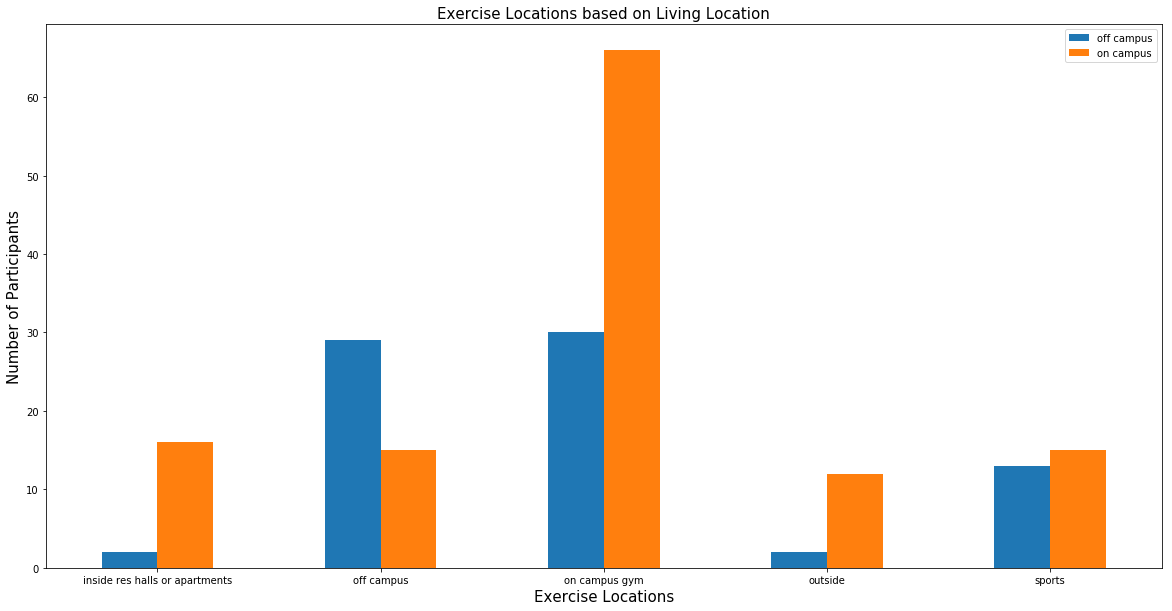

In [218]:
on_campus_gym = [off_campus_count[0], on_campus_count[0]]
off_campus = [off_campus_count[1], on_campus_count[1]]
sports = [off_campus_count[2], on_campus_count[2]]
outside = [off_campus_count[3], on_campus_count[3]]
inside_res = [off_campus_count[4], on_campus_count[4]]

#plot comparing on and off campus
bar_graph = pd.DataFrame({'on campus gym': on_campus_gym, 'off campus': off_campus, 'sports': sports, 
                         'outside': outside, 'inside res halls or apartments': inside_res}, index = ['off campus','on campus']).transpose()

ax = bar_graph.plot.bar(rot=0,figsize=(20,10))
ax.set_xlabel("Exercise Locations", size = 15)
ax.set_ylabel("Number of Participants", size = 15)
ax.set_title("Exercise Locations based on Living Location", size = 15)
plt.show()

Importance with curr/past level of activity & prior athlete stuff

In [223]:
#curr level of activity with importance
df['curr_activity_level'].value_counts()

Maintenance - regularly exercising for 6 months or more                                                            26
Preparation - doing exercise but not regularly                                                                     25
Priority - intensive exercise multiple times a week for 6 months or more to make a physical change in your body    24
Action - regularly exercise but for less than 6 months                                                             20
Contemplation - currently not doing exercise, but intending to start within the next six months                    19
Precontemplation - currently not doing exercise and not intending to start within the next six months               6
Name: curr_activity_level, dtype: int64

In [ ]:
#bar graph
#plt.bar(index, no_movies)
plt.xlabel('Genre', fontsize=5)
plt.ylabel('No of Movies', fontsize=5)
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('Market Share for Each Genre 1995-2017')
plt.show()

In [224]:
#past level of activity with importance
df['past_activity_level'].value_counts()

Maintenance - regularly exercising for 6 months or more before starting at UCSD                                    44
Preparation - exercised infrequently                                                                               25
Priority - intensive exercise multiple times a week for 6 months or more to make a physical change in your body    19
Contemplation - did not exercise but intended to start in college                                                  12
Action - regularly exercised but for less than 6 months before starting at UCSD                                    10
Precontemplation - did not exercise at all                                                                         10
Name: past_activity_level, dtype: int64

In [227]:
df['exercise_importance']

0       4
1       6
2       7
3       8
4       8
5       8
6       5
7       8
8       7
9       7
10      9
11      3
12      8
13      8
14      8
15      1
16     10
17      9
18     10
19     10
20      8
21      9
22      7
23      9
24      5
25      7
26      5
27      6
28      8
29      9
       ..
90     10
91     10
92      6
93      6
94      4
95     10
96      4
97      3
98      7
99     10
100     4
101     8
102     8
103     7
104     8
105     4
106     9
107     9
108     4
109     6
110     8
111     4
112     8
113     4
114     7
115     8
116     8
117    10
118     9
119     7
Name: exercise_importance, Length: 120, dtype: int64

In [269]:
for i in range(0, len(df['curr_activity_level'])):
    if "Precontemplation" in df['curr_activity_level'][i]:
        df['curr_activity_level'][i] = 0
    elif "Contemplation" in df['curr_activity_level'][i]:
        df['curr_activity_level'][i] = 1
    elif "Preparation" in df['curr_activity_level'][i]:
        df['curr_activity_level'][i] = 2
    elif "Action" in df['curr_activity_level'][i]:
        df['curr_activity_level'][i] = 3
    elif "Maintenance" in df['curr_activity_level'][i]:
        df['curr_activity_level'][i] = 4
    elif "Priority" in df['curr_activity_level'][i]:
        df['curr_activity_level'][i] = 5

for i in range(0, len(df['past_activity_level'])):
    if "Precontemplation" in df['past_activity_level'][i]:
        df['past_activity_level'][i] = 0
    elif "Contemplation" in df['past_activity_level'][i]:
        df['past_activity_level'][i] = 1
    elif "Preparation" in df['past_activity_level'][i]:
        df['past_activity_level'][i] = 2
    elif "Action" in df['past_activity_level'][i]:
        df['past_activity_level'][i] = 3
    elif "Maintenance" in df['past_activity_level'][i]:
        df['past_activity_level'][i] = 4
    elif "Priority" in df['past_activity_level'][i]:
        df['past_activity_level'][i] = 5

current = ["precontemplation", "contemplation", "preparation", "action", "maintenance", "priority"]
past = ["precontemplation", "contemplation", "preparation", "action", "maintenance", "priority"]

/Users/mirandago/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/mirandago/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/mirandago/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/Users/mirandago/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11:

In [270]:
count_arr = [[0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0]]
importance_arr = [[0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0]]

individuals = zip(df['curr_activity_level'], df['past_activity_level'], df['exercise_importance'])
for i in individuals:
    #print(i[0])
    #print(importance_arr[i[0]][i[1]])
    importance_arr[i[0]][i[1]] += i[2]
    count_arr[i[0]][i[1]] += 1


In [271]:
importance_arr

[[10, 5, 0, 3, 0, 0],
 [4, 13, 53, 18, 25, 0],
 [4, 26, 41, 11, 61, 15],
 [6, 15, 50, 0, 51, 30],
 [0, 7, 15, 16, 110, 60],
 [25, 9, 26, 17, 81, 56]]

In [272]:
count_arr

[[4, 1, 0, 1, 0, 0],
 [1, 3, 8, 3, 4, 0],
 [1, 4, 6, 2, 10, 2],
 [1, 2, 6, 0, 7, 4],
 [0, 1, 2, 2, 14, 7],
 [3, 1, 3, 2, 9, 6]]

In [291]:
avg_arr = [[0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0]]

for i in range(0, len(importance_arr)):
    for j in range(0, len(importance_arr)):
        if (count_arr[i][j] != 0):
            avg_arr[i][j] = float("%.2f"%(importance_arr[i][j]/count_arr[i][j]))
            
avg_arr

[[2.5, 5.0, 0, 3.0, 0, 0],
 [4.0, 4.33, 6.62, 6.0, 6.25, 0],
 [4.0, 6.5, 6.83, 5.5, 6.1, 7.5],
 [6.0, 7.5, 8.33, 0, 7.29, 7.5],
 [0, 7.0, 7.5, 8.0, 7.86, 8.57],
 [8.33, 9.0, 8.67, 8.5, 9.0, 9.33]]

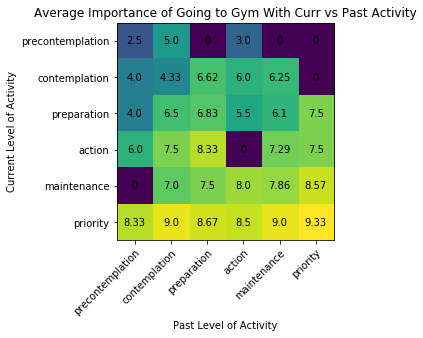

In [303]:
fig,ax = plt.subplots()
im = ax.imshow(avg_arr)

# We want to show all ticks...
ax.set_xticks(np.arange(len(past)))
ax.set_yticks(np.arange(len(current)))
# ... and label them with the respective list entries
ax.set_xticklabels(past)
ax.set_yticklabels(current)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(current)):
    for j in range(len(past)):
        text = ax.text(j, i, avg_arr[i][j],
                       ha="center", va="center")

ax.set_title("Average Importance of Going to Gym With Curr vs Past Activity")
ax.set_xlabel('Past Level of Activity')
ax.set_ylabel('Current Level of Activity')
#fig.tight_layout()
plt.show()